# Retrieval with Known Answer

In this notebook, we will set up a simulated TTV system, where the answer is known. We will then run `ttvnest` on the simulated data and verify that we recover a good solution. First, we import necessary packages:

In [1]:
%matplotlib inline
import ttvnest
import numpy as np

Now we set up our simulation by running a forward model on a dummy `ttvnest` simulation. This is a two planet system in which both planets transit. Planet one has $$M_1/M_\star = 4\ M_\mathrm{Earth}/M_\mathrm{Sun}, P_1 = 10.0\ \mathrm{days}, e_1\cos\omega_1 = 0.02, e_1\sin\omega_1 = 0.01, T_{0,1} = 2.0\ \mathrm{days}.$$ Planet two has $$M_2/M_\star = 6\ M_\mathrm{Earth}/M_\mathrm{Sun}, P_2 = 15.2\ \mathrm{days}, e_2\cos\omega_2 = 0.025, e_2\sin\omega_2 = 0.015, T_{0,2} = 5.0\ \mathrm{days}.$$ By default, the planets are set to be coplanar. Notice that the system is close to a 3:2 mean-motion resonance, so that we get a nice-looking TTV curve. In this simple test, the data are homoskedastic with $\sigma = 2\times10^{-4}$ days = 0.288 min.

In [2]:
theta = [4., 10., 0.02, 0.01, 2., 6., 15.2, 0.025, 0.015, 5.]
error_scale = 2e-4

#these are dummy arrays for the ttvs, errors, and observation epochs
planet_a = ttvnest.TTVPlanet([2., 12.], [1., 1.], [0, 1]) 
planet_b = ttvnest.TTVPlanet([5., 20.2], [1., 1.], [0, 1]) 
system = ttvnest.TTVSystem(planet_a, planet_b, sim_length = 1000)

data = system.forward_model(theta)
errs = [np.ones(arr.shape)*error_scale for arr in data]
epochs = [np.arange(len(arr)) for arr in data]

Simulation start/reference time:  0.0
ttvnest timestep:  0.04
Simulation length:  1000
Simulation end time:  1000.0


For our retrieval, we set up two ``TTVPlanet`` objects, initialized with arrays of transit timing data, errors, and observation epochs (where the first transit after the simulation start time MUST be epoch 0). We can also pretty reliably guess that the average periods are around 10 days and 15.2 days for the planets, so we update the period prior with that knowledge. Finally in this example (to make the run time a bit nicer), we're going to assume someone has done some first-order TTV theory and shown that the masses are probably small, so we'll use a uniform prior between 0 and 10 earth masses (relative to the stellar mass) for both planets. 

Finally, we put these planets into a ``TTVSystem``, using the external timekeeping system (with internal setting of dt):

In [3]:
planet_a = ttvnest.TTVPlanet(data[0], errs[0], epochs[0], mass_prior = ('Uniform', 0, 10.), 
                     period_prior = ('Normal', 10., 0.01))
planet_b = ttvnest.TTVPlanet(data[1], errs[1], epochs[1], mass_prior = ('Uniform', 0, 10.), 
                     period_prior = ('Normal', 15.2, 0.01))
system = ttvnest.TTVSystem(planet_a, planet_b, start_time = 0, sim_length = 1000)

Simulation start/reference time:  0
ttvnest timestep:  0.4
Simulation length:  1000
Simulation end time:  1000


Let's visualize how these TTV data look (when the best-fit average period is detrended out):

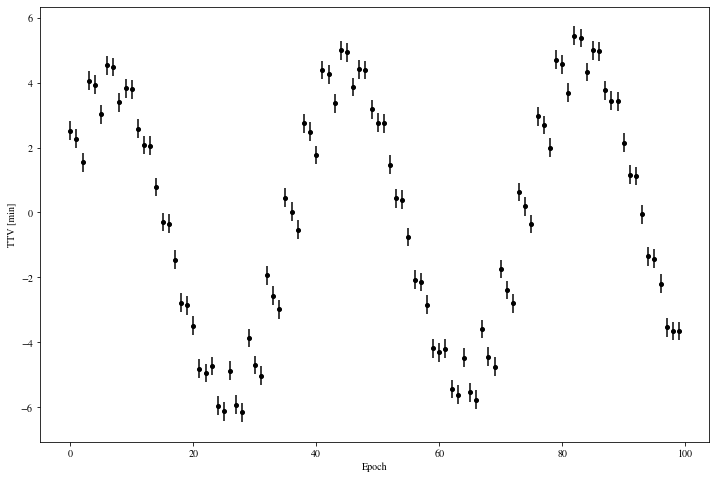

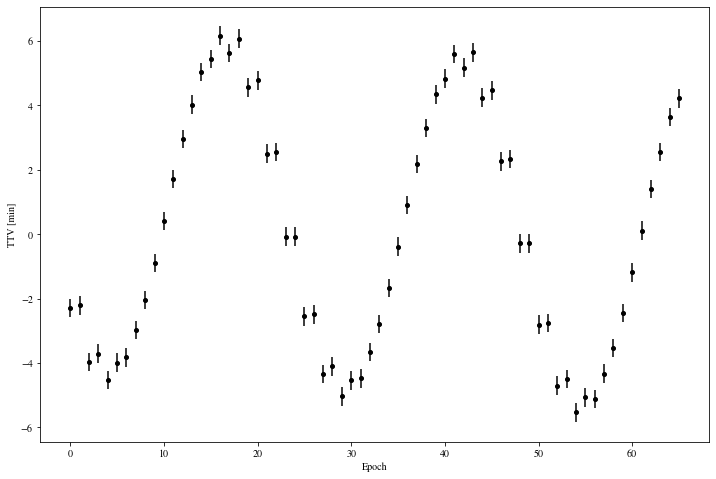

In [4]:
ttvnest.plot_utils.plot_ttv_data(system)

Beautiful, anticorrelated TTV signals as we would expect, with chopping thrown in for good measure (the synodic timescale here is $(P_1^{-1} - P_2^{-1})^{-1} = 29.2$ days, so we get chopping on about three epoch timescales for the first planet and about two epoch timescales for the second). Should be a good test case to run a retrieval on!


Before we run our retrieval, let's check what the theoretical maximum for the log-likelihood is using our known solution:

In [5]:
system.log_likelihood(theta, system.data, system.errs, system.epochs)

1261.3100805421548

Finally, let's run our retrieval!

In [6]:
results = system.retrieve()

11805it [07:54,  3.45it/s, batch: 0 | bound: 22 | nc: 187 | ncall: 166265 | eff(%):  7.058 | loglstar:   -inf <   -inf <    inf | logz:   -inf +/-    nan | dlogz:    inf >  0.010] /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
11956it [08:49,  9.25it/s, batch: 0 | bound: 24 | nc: 25 | ncall: 179589 | eff(%):  6.621 | loglstar:   -inf <   -inf <    inf | logz:   -inf +/-    nan | dlogz:    inf >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
12000it [09:16,  8.98it/s, batch: 0 | bound: 25 | nc: 25 | ncall: 189797 | eff(%):  6.289 | loglstar:   -inf <   -inf <    inf | logz:   -inf +/-    nan | dlogz:    inf >  0.010]  /u

24076it [38:02,  7.31it/s, batch: 0 | bound: 132 | nc: 25 | ncall: 597720 | eff(%):  4.021 | loglstar:   -inf < -30253.340 <    inf | logz: -30285.005 +/-    nan | dlogz: 28003.695 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
24137it [38:27,  7.53it/s, batch: 0 | bound: 133 | nc: 25 | ncall: 602501 | eff(%):  3.999 | loglstar:   -inf < -29592.781 <    inf | logz: -29624.502 +/-    nan | dlogz: 27337.197 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
24151it [38:46,  5.35it/s, batch: 0 | bound: 134 | nc: 25 | ncall: 606112 | eff(%):  3.978 | loglstar:   -inf < -29525.102 <    inf | logz: -29555.768 +/-    

/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
29057it [58:46,  1.92it/s, batch: 0 | bound: 182 | nc: 136 | ncall: 853583 | eff(%):  3.400 | loglstar:   -inf < -5714.979 <    inf | logz: -5751.342 +/-    nan | dlogz: 6088.355 >  0.010] /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
29586it [1:00:04,  1.40it/s, batch: 0 | bound: 187 | nc: 389 | ncall: 869950 | eff(%):  3.397 | loglstar:   -inf < -4725.234 <    inf | logz: -4761.491 +/-    nan | dlogz: 5096.836 >  0.010]/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-

/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
37838it [1:25:30,  7.43it/s, batch: 0 | bound: 265 | nc: 25 | ncall: 1193019 | eff(%):  3.169 | loglstar:   -inf < 742.518 <    inf | logz: 699.370 +/-    nan | dlogz: 448.755 >  0.010]   /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
38411it [1:27:37,  7.63it/s, batch: 0 | bound: 270 | nc: 25 | ncall: 1219169 | eff(%):  3.148 | loglstar:   -

/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
50670it [2:09:27,  8.37it/s, batch: 0 | bound: 370 | nc: 25 | ncall: 1766875 | eff(%):  2.866 | loglstar:   -inf < 1247.730 <    inf | logz: 1196.030 +/-    nan | dlogz: 12.284 >  0.010]   /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
51840it [2:13:33,  7.66it/s, batch: 0 | bound: 379 | nc: 25 | ncall: 1822779 | eff(%):  2.842 | loglstar:   

We finished with a best log-likelihood $>1260$, which is pretty close to the theoretical maximum! Let's get a summary of our results in $\LaTeX$-friendly format:

In [7]:
system.posterior_summary()

Summary (middle 95 percentile): 
$M_1/M_\star/3\times10^{-6}$: $3.914528^{+0.19799}_{-0.201117}$
$P_1\ [\mathrm{days}]$: $10.000027^{+5.5e-05}_{-4.8e-05}$
$\sqrt{e}_1\cos(\omega_1)$: $-0.025739^{+0.073297}_{-0.0844}$
$\sqrt{e}_1\sin(\omega_1)$: $0.004399^{+0.037566}_{-0.099124}$
$T_{0,1}\ [\mathrm{days}]$: $1.999985^{+9.7e-05}_{-9.4e-05}$
$M_2/M_\star/3\times10^{-6}$: $5.84887^{+0.315675}_{-0.328007}$
$P_2\ [\mathrm{days}]$: $15.199962^{+7.2e-05}_{-8.1e-05}$
$\sqrt{e}_2\cos(\omega_2)$: $-0.014996^{+0.063127}_{-0.082567}$
$\sqrt{e}_2\sin(\omega_2)$: $-0.000593^{+0.03796}_{-0.083579}$
$T_{0,2}\ [\mathrm{days}]$: $5.000015^{+9.5e-05}_{-0.000104}$


The solution above is within the middle 95% of our retrieved posterior. Let's see how the best-fit solution and uncertainty look, for good measure:

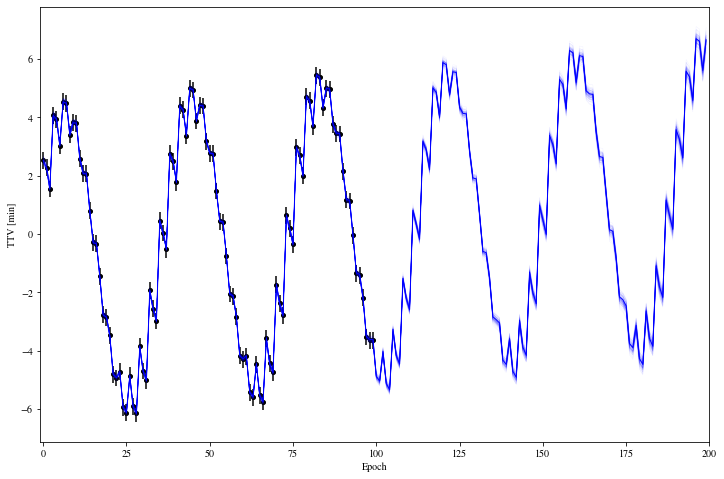

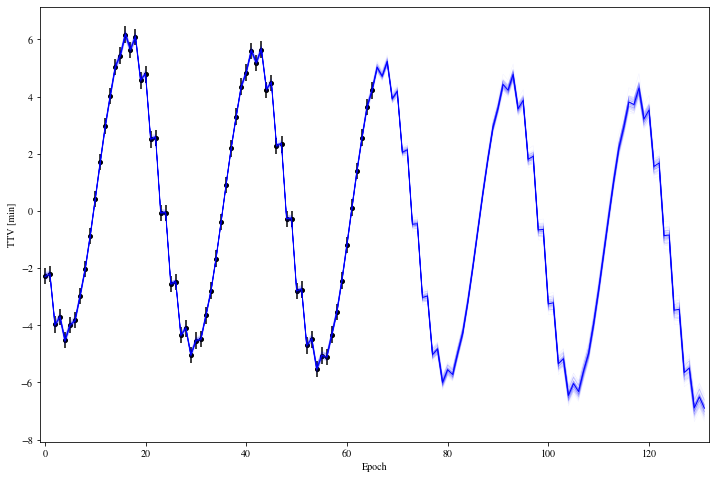

In [8]:
ttvnest.plot_utils.plot_results(system, uncertainty_curves = 100, sim_length = 2000)

With a hundred random draws from the posterior, it looks like we have a really solid constraint on the timing curve (even if the best solution we got isn't *exactly* the known answer). 

Finally, let's look at the corner plots (for viewing the marginalized posteriors) and trace plot (showing the evolution of all parameters over the run) from ``dynesty``:

<Figure size 1440x1440 with 0 Axes>

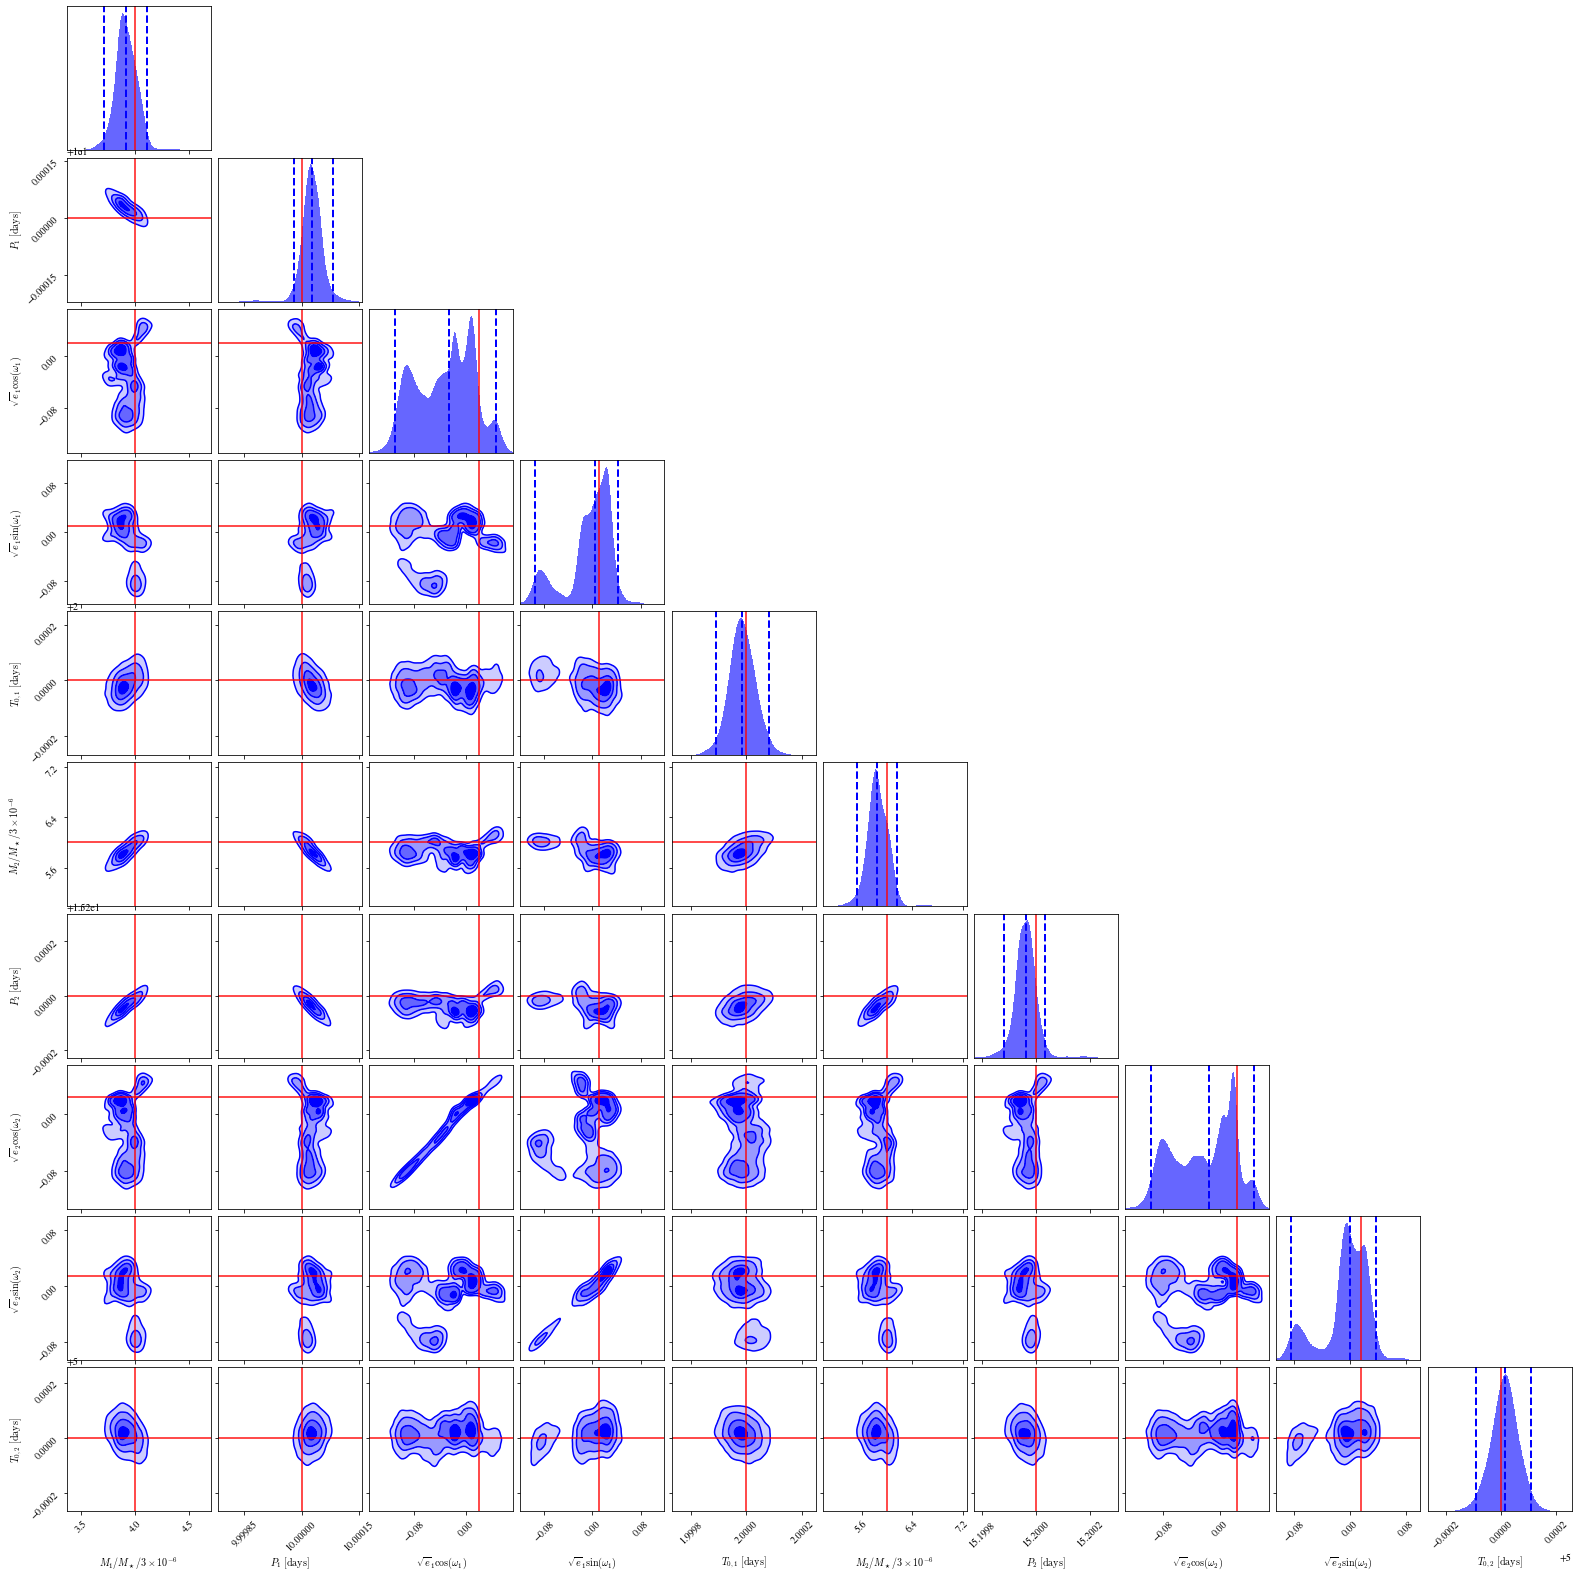

<Figure size 1440x1440 with 0 Axes>

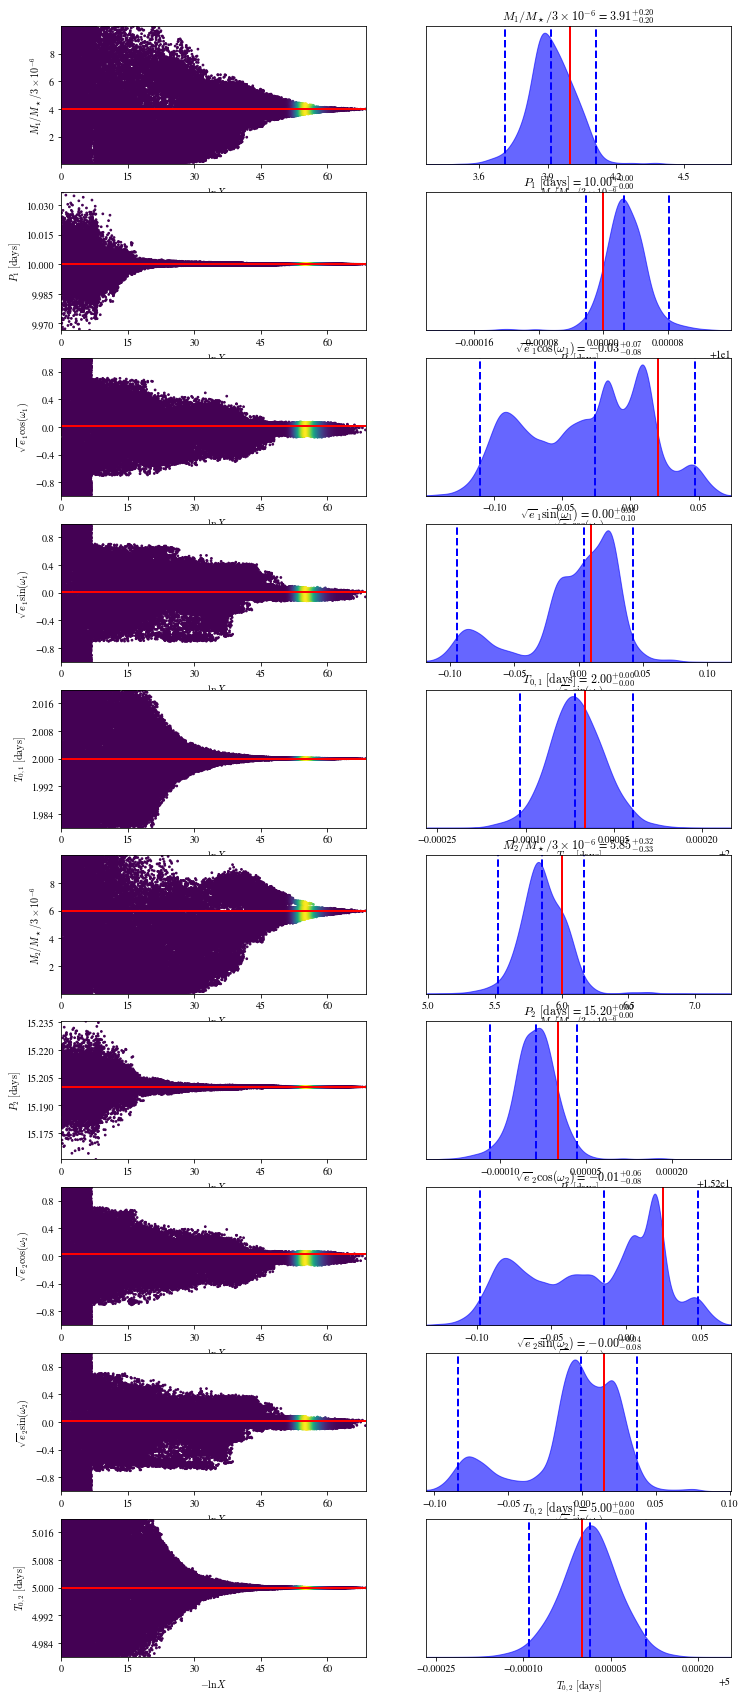

/usr/local/lib/python3.7/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]


Axis limits error on runplot; internal to dynesty


/usr/local/lib/python3.7/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))


In [9]:
ttvnest.plot_utils.dynesty_plots(system, truthvals = theta)

Looks like our expected solution really does fall inside our posterior!